# Assessment 03- Model Evaluation

## Name- Dulgani Bhagya
## Student Id - A00087852


# <span style="color:blue">Dataset Preparation</span>

####  Download Dataset

Humdata.org. (2020). Novel Coronavirus (Covid-19) cases data. Retrieved from.
https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases [Accessed 05 August 2020].

Use the file named `time_series_covid19_confirmed_global.csv`.

#### Importing Libraries

In [583]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import scale 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


#### load the data set

In [584]:
# Load the dataset
df = pd.read_csv('time_series_covid19_confirmed_global.csv') 
# Display the first few rows of the dataset
df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


# <span style="color:blue">Data Analysis and Visualisation</span>
## <span style="color:rgb(0, 115, 153)">a) Predictive Modelling</span>

In [585]:
# Display the data type of each column
column_types = df.dtypes

# Print the column types
print(column_types)

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object


In the dataset Province/State and Country/Region contains object as their data type and lat,long is in float64 while the dates are in the type of int64. as per the assessment, for a easier manipulation and analysis of time-series data,column names (which represent dates)need to be converted into a datetime format

In [586]:
# Identify columns with dates 
date_columns = [col for col in df.columns if '/' in col and col != 'Province/State' and col != 'Country/Region']

# Convert only the column names to with date format
df.rename(columns={col: pd.to_datetime(col, format='%m/%d/%y').strftime('%m/%d/%Y') for col in date_columns}, inplace=True)

# Display the updated DataFrame
print(df)

    Province/State        Country/Region        Lat        Long  01/22/2020  \
0              NaN           Afghanistan  33.939110   67.709953           0   
1              NaN               Albania  41.153300   20.168300           0   
2              NaN               Algeria  28.033900    1.659600           0   
3              NaN               Andorra  42.506300    1.521800           0   
4              NaN                Angola -11.202700   17.873900           0   
..             ...                   ...        ...         ...         ...   
284            NaN    West Bank and Gaza  31.952200   35.233200           0   
285            NaN  Winter Olympics 2022  39.904200  116.407400           0   
286            NaN                 Yemen  15.552727   48.516388           0   
287            NaN                Zambia -13.133897   27.849332           0   
288            NaN              Zimbabwe -19.015438   29.154857           0   

     01/23/2020  01/24/2020  01/25/2020  01/26/2020

this code standardize the format of date columns in  DataFrame, making it easier to work with time-series data and ensures all date columns follow a consistent date format ('%m/%d/%Y')

__date_columns gives the column names that have a '/' in them and are not equal to 'Province/State' or 'Country/Region'__

__csv file contains dates in the format of ddmmyy therefor convert the existing date format to the ddmmyyyy format using pd.to_datetime(...).strftime('%m/%d/%Y'). then using the rename method renamed the wanted column names__
__inpace==true -  modifies the DataFrame in place__

In [587]:
df

,Province/State,Country/Region,Lat,Long,01/22/2020,01/23/2020,01/24/2020,01/25/2020,01/26/2020,01/27/2020,...,02/28/2023,03/01/2023,03/02/2023,03/03/2023,03/04/2023,03/05/2023,03/06/2023,03/07/2023,03/08/2023,03/09/2023
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


there are some missing values in this csv file we use to do the data analysis. therefore, filled 'Province/State' with 'Unknown' to ensure a consistent and recognizable value is in the cell for instances where the province/state information is missing. 'Lat' and 'Long' missing values replaced with their means. 



In [588]:
# Fill missing values in 'Province/State' column with 'Unknown'
df_long['Province/State'].fillna('Unknown', inplace=True)

# Fill missing values in 'Lat' and 'Long' columns with their means
df_long['Lat'].fillna(df_long['Lat'].mean(), inplace=True)
df_long['Long'].fillna(df_long['Long'].mean(), inplace=True)

Reshaping a df from wide to long format ensures better data organization and analysis.this is often done when dealing with time series or longitudinal data. 

The wide format is characterized by having separate columns for different time points, while the long format organizes the data with a single column for time and another for values.

In [589]:
# Reshape the DataFrame from wide to long format
df_long = pd.melt(df, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Cases')

df_long

,Province/State,Country/Region,Lat,Long,Date,Cases
0,NaN,Afghanistan,33.939110,67.709953,01/22/2020,0
1,NaN,Albania,41.153300,20.168300,01/22/2020,0
2,NaN,Algeria,28.033900,1.659600,01/22/2020,0
3,NaN,Andorra,42.506300,1.521800,01/22/2020,0
4,NaN,Angola,-11.202700,17.873900,01/22/2020,0
...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,03/09/2023,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,03/09/2023,535
330324,NaN,Yemen,15.552727,48.516388,03/09/2023,11945
330325,NaN,Zambia,-13.133897,27.849332,03/09/2023,343135


#### convert days to weeks

as per the assessment requirement, converted the dates in to weeks and then assigned calculated weeks in to a single column named as " Week". The 'Week' column represents the weeks since 2020-01-22. 

for each week the sum of the cases is calculated and allocated the value in to a seperate column named as "Cases"

this procedure ease the analysing part 


In [590]:
df_long['Date'] = pd.to_datetime(df_long['Date'])
df_long['Week'] = ((df_long['Date'] - pd.to_datetime('2020-01-22')).dt.days // 7) + 1

# Group by 'Country/Region' and 'Week', summing the 'Cases'
df_grouped = df_long.groupby(['Country/Region', 'Week'])['Cases'].sum().reset_index()

# Display the grouped DataFrame
print(df_grouped)

      Country/Region  Week    Cases
0        Afghanistan     1        0
1        Afghanistan     2        0
2        Afghanistan     3        0
3        Afghanistan     4        0
4        Afghanistan     5       10
...              ...   ...      ...
32959       Zimbabwe   160  1841581
32960       Zimbabwe   161  1845494
32961       Zimbabwe   162  1847447
32962       Zimbabwe   163  1848889
32963       Zimbabwe   164   528552

[32964 rows x 3 columns]


display the date range for each week to ensure that the input data for analysing is correct.as per the assessment requirements first week should be in range  2020-01-22 and 2020-01-28.


In [591]:
df_week1 = df_long[df_long['Week'] == 1]
df_week2 = df_long[df_long['Week'] == 2]

# Display the date range for the 1st and 2nd week
print("Date range for the 1st week:")
print(df_week1['Date'].min(), "to", df_week1['Date'].max())

print("\nDate range for the 2nd week:")
print(df_week2['Date'].min(), "to", df_week2['Date'].max())

Date range for the 1st week:
2020-01-22 00:00:00 to 2020-01-28 00:00:00

Date range for the 2nd week:
2020-01-29 00:00:00 to 2020-02-04 00:00:00


### data analysis and visualisation of the top three infected countries

here, we analyze and identify the top three countries with the highest total number of cases based on the total number of cases. 

US has the most number of cases reported specifically 53813184406 cases. and India got the second place reporting 29131119694 cases while Brazil got third place reporting 21182690594 cases

In [592]:
# Group the data by country or region and calculate the total cases for each country
df_country_total = df_grouped.groupby('Country/Region')['Cases'].sum().reset_index()

# Sort the DataFrame by total cases in descending order
df_country_total_sorted = df_country_total.sort_values(by='Cases', ascending=False)

# Identify the top three infected countries
print("top three infected countries:")
top_three_countries = df_country_total_sorted.head(3)
print(top_three_countries)

top three infected countries:
    Country/Region        Cases
186             US  53813184406
80           India  29131119694
24          Brazil  21182690594


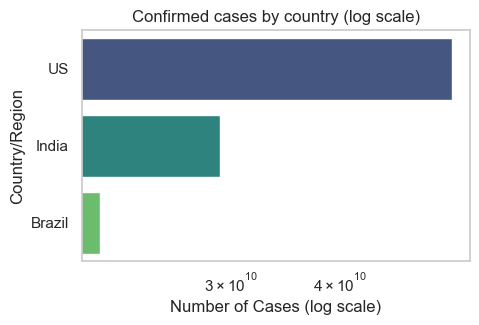

In [593]:
# Use Seaborn for plotting
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='Cases', y='Country/Region', data=top_three_countries, palette='viridis')
ax.set_xscale('log')

# Customization of plot appearance
ax.set_title('Confirmed cases by country (log scale)')
ax.set_xlabel('Number of Cases (log scale)')
plt.show()

the horizontal bar plot is showing the differences in cases of the top three countries more clearly. Acoording to the plot US has an extremely high number of confirmed cases, reaching 53813184406

 ### Identify countries with the highest variance

These values represent the amount of variability  in covid 19 cases across weeks for each country.
A higher variance- more fluctuation in the number of cases(rapid increases and rapid decreases)

In [594]:
# Calculate the variance for each country
variance = df_grouped.groupby('Country/Region')['Cases'].var().reset_index().sort_values(by='Cases', ascending=False)

# print the countries with the highest variance
print("Countries with the highest variance in variance in COVID-19 cases:")
print(sorted_countries.head(3))

Countries with the highest variance in variance in COVID-19 cases:
    Country/Region         Cases
186             US  6.505712e+16
80           India  1.520040e+16
63          France  1.054829e+16


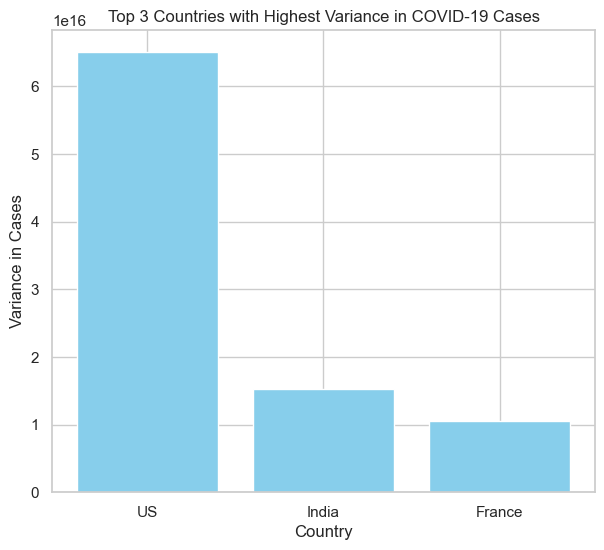

In [656]:
plt.figure(figsize=(7, 6))
plt.bar(variance['Country/Region'][:3], variance['Cases'][:3], color='skyblue')
plt.title('Top 3 Countries with Highest Variance in COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Variance in Cases')
plt.show()


the below plot visualizes the total number of cases over time for each country.each line line shows how the cases fluctuated over time. some of the countries including us, india, france, brazil shows a higher variance while other countries shows lower variance.

According to the plot a higher variance indicates that the number of cases has experienced more significant fluctuations over the time period. this has nothing to do with the total number of cases.
High variance doesn't imply a larger total number of cases.
countries with low variance would have a more stable pattern in covid 19 cases.

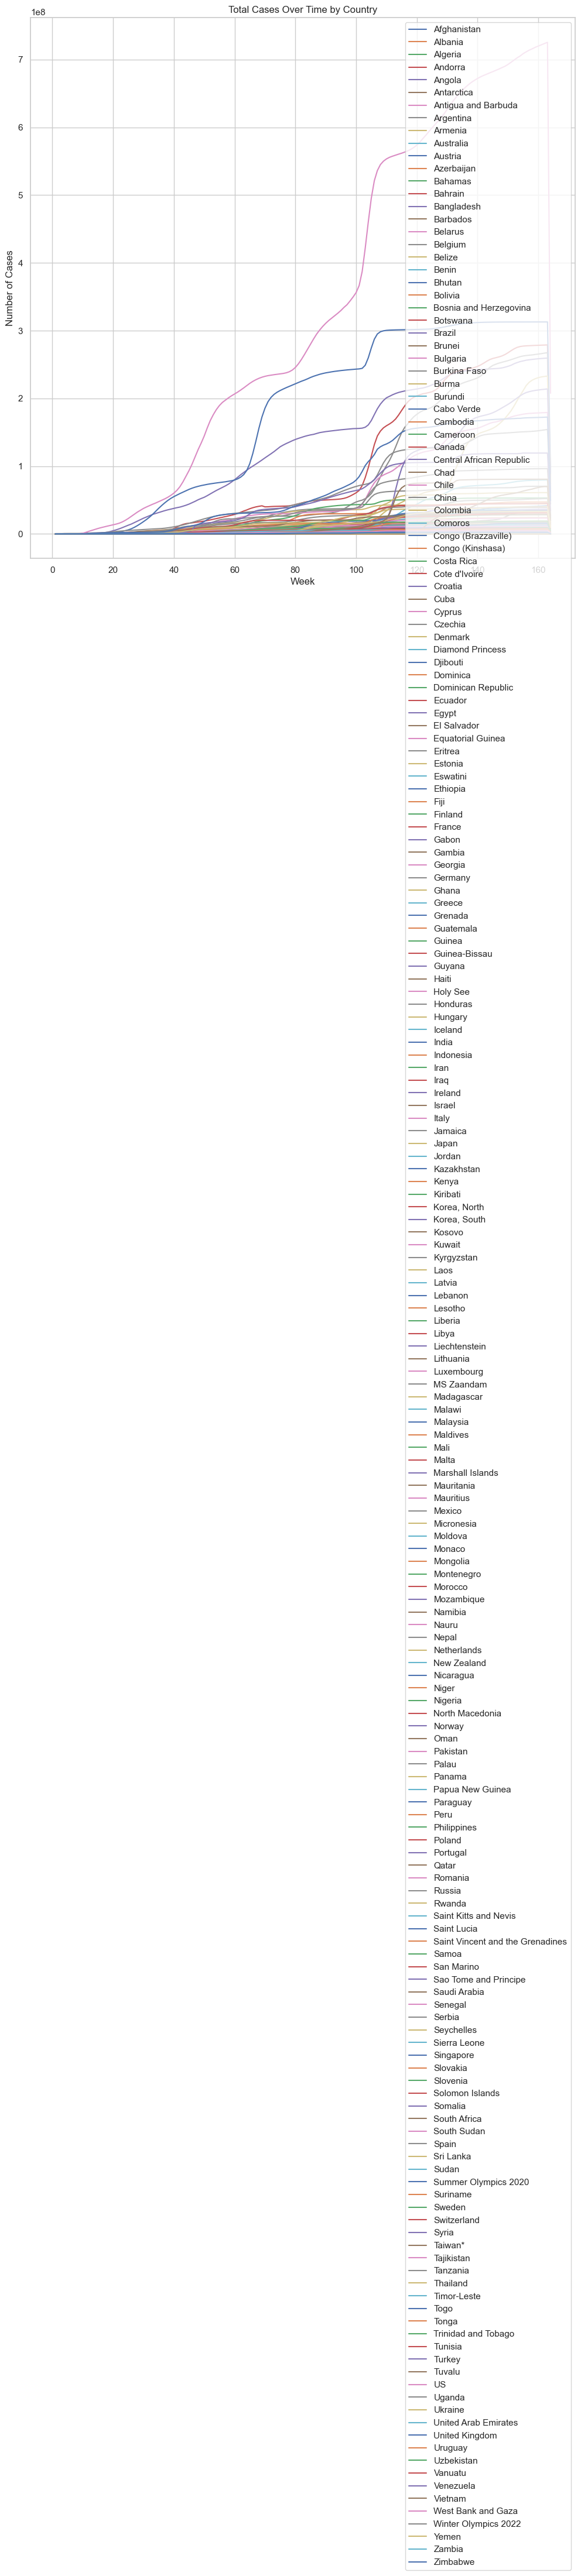

In [595]:
# the size of the plot
plt.figure(figsize=(12, 12))

# Get a list of unique countries in the DataFrame
countries = df_grouped['Country/Region'].unique()

# Plot a line for each country
for country in countries:
    country_data = df_grouped[df_grouped['Country/Region'] == country]
    plt.plot(country_data['Week'], country_data['Cases'], label=country)

plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.title('Total Cases Over Time by Country')
plt.legend()
plt.grid(True)
plt.show()



### linear regression model to the time-series data for each of the three countries

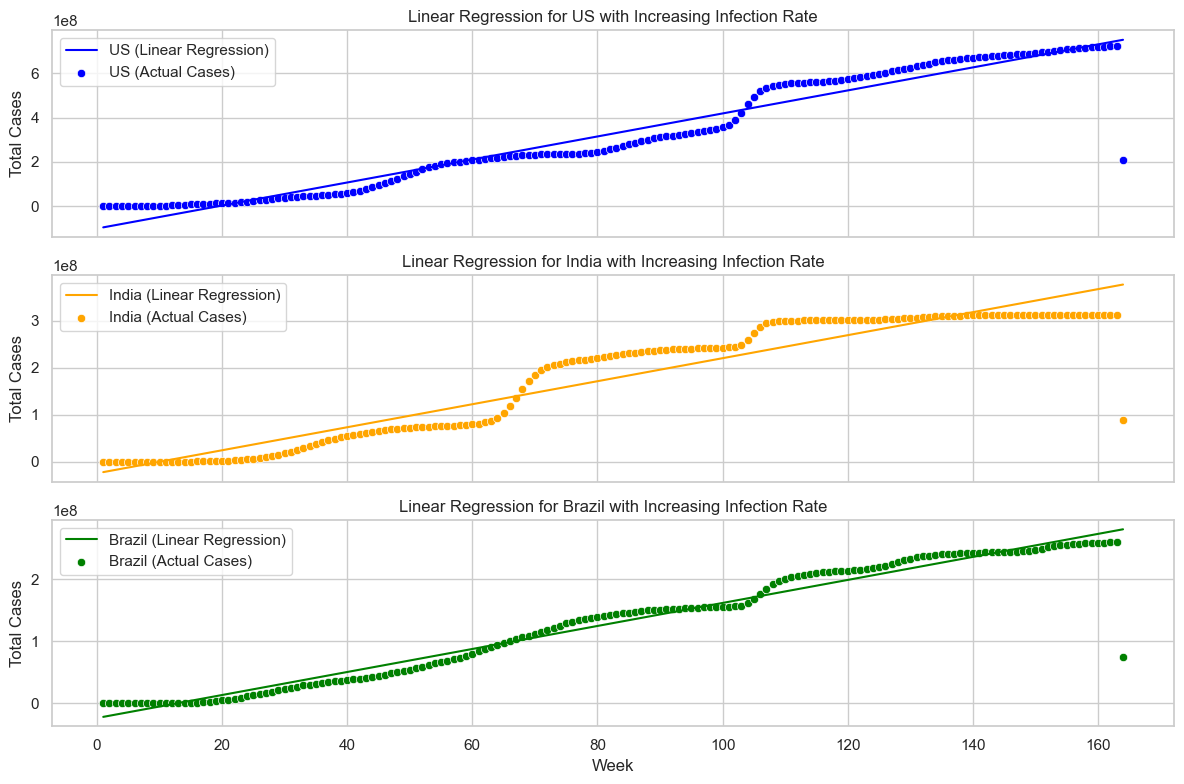

Model for US: Coefficients: [5205960.3303987], Intercept: -101362554.05057609
Model for India: Coefficients: [2453757.33542639], Intercept: -24806201.550725788
Model for Brazil: Coefficients: [1853846.91869465], Intercept: -23779623.267918587


In [596]:

# get the data for the top three countries
top_countries = df_grouped.groupby('Country/Region')['Cases'].sum().nlargest(3).index

# Set up subplots
fig, axes = plt.subplots(nrows=len(top_countries), figsize=(12, 8), sharex=True)
colors = ['blue', 'orange', 'green']

# Fit a linear regression model for each country
models = {}
for i, (country, color) in enumerate(zip(top_countries, colors)):
    country_data = filtered_data[filtered_data['Country/Region'] == country]
    X = country_data['Week'].values.reshape(-1, 1)  
    y = country_data['Cases'].values  

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    models[country] = model

    # Plotting
    sns.lineplot(x=X.flatten(), y=model.predict(X), label=f"{country} (Linear Regression)", ax=axes[i], color=color)
    sns.scatterplot(x=X.flatten(), y=y, label=f"{country} (Actual Cases)", ax=axes[i], color=color)

    # labels and title
    axes[i].set_xlabel('Week')
    axes[i].set_ylabel('Total Cases')
    axes[i].set_title(f'Linear Regression for {country} with Increasing Infection Rate')

    # legend
    axes[i].legend()

#layout
plt.tight_layout()

# print the plot
plt.show()

# Output the models
for country, model in models.items():
    print(f"Model for {country}: Coefficients: {model.coef_}, Intercept: {model.intercept_}")


#### Future prediction of the top three countries

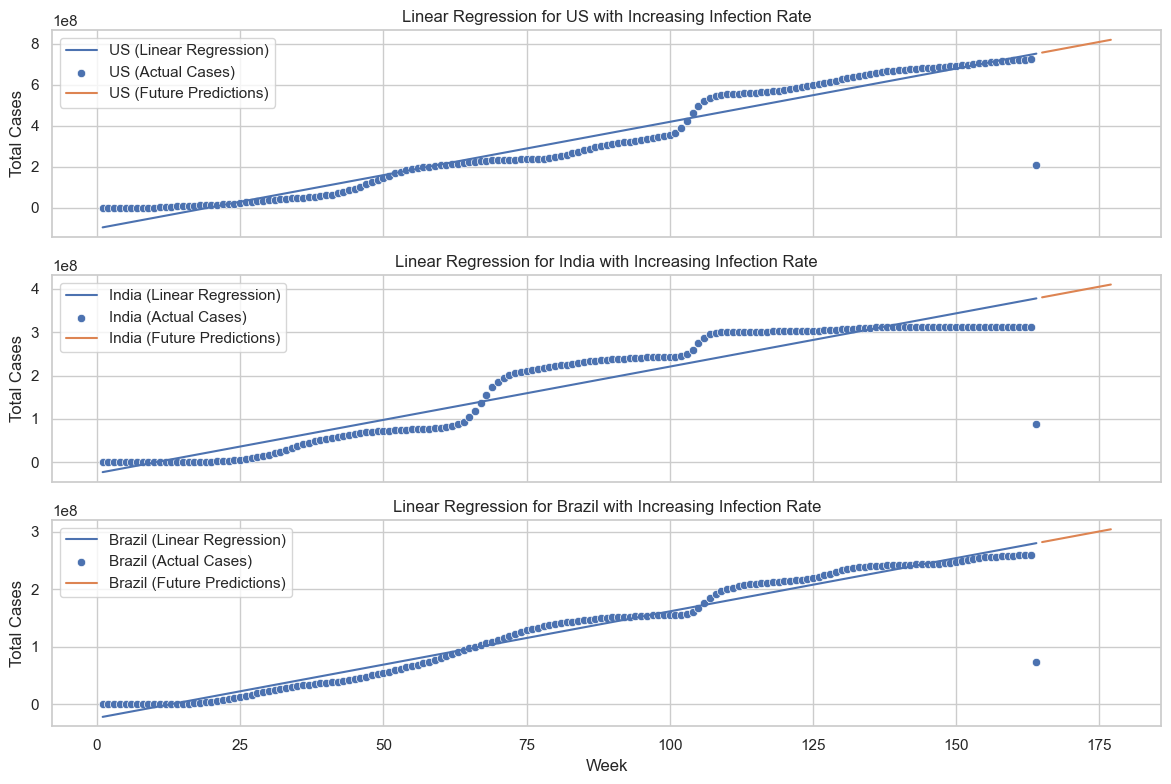

prediction for three months US: Week [165 166 167 168 169 170 171 172 173 174 175 176 177], Predicted Cases [7.57620900e+08 7.62826861e+08 7.68032821e+08 7.73238781e+08
 7.78444742e+08 7.83650702e+08 7.88856662e+08 7.94062623e+08
 7.99268583e+08 8.04474543e+08 8.09680504e+08 8.14886464e+08
 8.20092424e+08]

prediction for three months India: Week [165 166 167 168 169 170 171 172 173 174 175 176 177], Predicted Cases [3.80063759e+08 3.82517516e+08 3.84971273e+08 3.87425031e+08
 3.89878788e+08 3.92332545e+08 3.94786303e+08 3.97240060e+08
 3.99693817e+08 4.02147575e+08 4.04601332e+08 4.07055089e+08
 4.09508847e+08]

prediction for three months Brazil: Week [165 166 167 168 169 170 171 172 173 174 175 176 177], Predicted Cases [2.82105118e+08 2.83958965e+08 2.85812812e+08 2.87666659e+08
 2.89520506e+08 2.91374353e+08 2.93228200e+08 2.95082047e+08
 2.96935894e+08 2.98789741e+08 3.00643588e+08 3.02497434e+08
 3.04351281e+08]



In [597]:
# getting top three countries
top_countries = df_grouped.groupby('Country/Region')['Cases'].sum().nlargest(3).index

# Set up subplots
fig, axes = plt.subplots(nrows=len(top_countries), figsize=(12, 8), sharex=True)

# Fit a linear regression model for each country
models = {}
for i, country in enumerate(top_countries):
    country_data = filtered_data[filtered_data['Country/Region'] == country]
    X = country_data['Week'].values.reshape(-1, 1)  
    y = country_data['Cases'].values  
 
    model = LinearRegression()
    model.fit(X, y)
    models[country] = model

    # Plotting
    sns.lineplot(x=X.flatten(), y=model.predict(X), label=f"{country} (Linear Regression)", ax=axes[i])
    sns.scatterplot(x=X.flatten(), y=y, label=f"{country} (Actual Cases)", ax=axes[i])

    #labels and title
    axes[i].set_xlabel('Week')
    axes[i].set_ylabel('Total Cases')
    axes[i].set_title(f'Linear Regression for {country} with Increasing Infection Rate')

    #legend
    axes[i].legend()

    # Predict future performances foe another month
    future_weeks = np.arange(X.max() + 1, X.max() + 14).reshape(-1, 1)
    future_cases = model.predict(future_weeks)

    # Plot future predictions
    sns.lineplot(x=future_weeks.flatten(), y=future_cases, label=f"{country} (Future Predictions)", ax=axes[i])

#layout
plt.tight_layout()

# Print the plot
plt.show()

# Output the models along their future cases
for country, model in models.items():
    
    # Output the predictions
    future_weeks = np.arange(X.max() + 1, X.max() + 14).reshape(-1, 1)
    future_cases = model.predict(future_weeks)
    print(f"prediction for three months {country}: Week {future_weeks.flatten()}, Predicted Cases {future_cases}")
    print()


## <span style="color:rgb(0, 115, 153)">b) Clustering</span>

A cluster refers to a collection of data points aggregated together because of certain similarities.

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.it identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible

In this section, a K-Means clustering is performing on the dataset. country that had the highest amount of variance is used to calculate the k means. 


In [598]:
df_grouped

,Country/Region,Week,Cases
0,Afghanistan,1,0
1,Afghanistan,2,0
2,Afghanistan,3,0
3,Afghanistan,4,0
4,Afghanistan,5,10
...,...,...,...
32959,Zimbabwe,160,1841581
32960,Zimbabwe,161,1845494
32961,Zimbabwe,162,1847447
32962,Zimbabwe,163,1848889


__for the clustering, only the highest variance country is needed.__ 

In [599]:
country_data = df_grouped[df_grouped['Country/Region'] == "US"]

In [600]:
country_data

,Country/Region,Week,Cases
30504,US,1,21
30505,US,2,58
30506,US,3,84
30507,US,4,97
30508,US,5,108
...,...,...,...
30663,US,160,719999991
30664,US,161,721846509
30665,US,162,723659953
30666,US,163,725416580


In [601]:
# drop the column country 
country_data = country_data.drop(columns=['Country/Region'])
country_data = country_data.set_index('Week')
country_data

,Cases
Week,
1,21
2,58
3,84
4,97
5,108
...,...
160,719999991
161,721846509
162,723659953


In [602]:
X = country_data.copy()

calculates the inertia for different values of k is calculated. then is is showed using elbow method graph.

The Elbow Method helps in identifying the optimal number of clusters by __looking for an "elbow" point__ where the reduction in inertia slows down.

According to the following elbow graph the k = 4 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

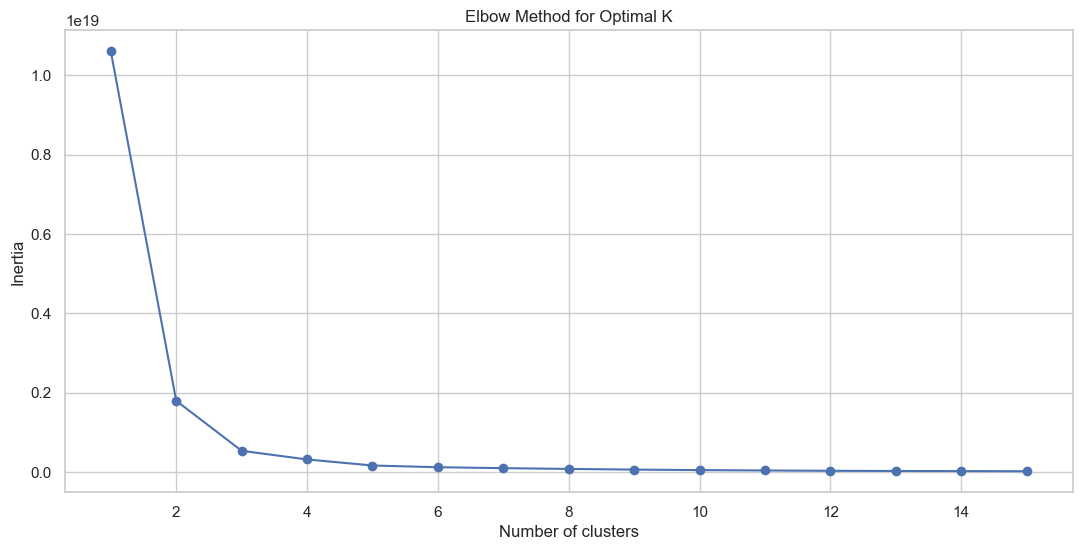

In [603]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(13, 6))
plt.plot(range(1, 16), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [604]:
# Perform clustering on the scaled data
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [605]:
# prints the  array of clusters
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0])

In [606]:
#scale the features in X(country data)
X_scaled=scale(X)
X_scaled

array([[-1.29040349],
       [-1.29040334],
       [-1.29040324],
       [-1.29040319],
       [-1.29040314],
       [-1.29040264],
       [-1.29039245],
       [-1.29031574],
       [-1.28959093],
       [-1.28690554],
       [-1.28152162],
       [-1.27550261],
       [-1.26998829],
       [-1.26440028],
       [-1.25909161],
       [-1.25425868],
       [-1.24992988],
       [-1.2456645 ],
       [-1.24170746],
       [-1.23761194],
       [-1.23347363],
       [-1.22839   ],
       [-1.22118198],
       [-1.2118839 ],
       [-1.20084322],
       [-1.18842845],
       [-1.17581822],
       [-1.16394149],
       [-1.15310293],
       [-1.14261112],
       [-1.13409324],
       [-1.12605671],
       [-1.11834689],
       [-1.11134637],
       [-1.10340653],
       [-1.09533185],
       [-1.08713548],
       [-1.07783368],
       [-1.06695705],
       [-1.05389806],
       [-1.0378921 ],
       [-1.01652585],
       [-0.98850827],
       [-0.95545985],
       [-0.9227947 ],
       [-0

In [607]:
# converting the scaled features into a DataFrame
# useful if it needs to merge with other DataFrames or work in tabular format
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,Cases
0,-1.290403
1,-1.290403
2,-1.290403
3,-1.290403
4,-1.290403
...,...
159,1.541074
160,1.548336
161,1.555468
162,1.562376


In [608]:
# creates a new column 'Cluster' in the DataFrame 
# assigns the cluster labels to that new column
X_scaled_df['Cluster'] = clusters
X_scaled_df

,Cases,Cluster
0,-1.290403,2
1,-1.290403,2
2,-1.290403,2
3,-1.290403,2
4,-1.290403,2
...,...,...
159,1.541074,3
160,1.548336,3
161,1.555468,3
162,1.562376,3


following code Perform clustering on the scaled data with the optimal K.this show how cases of the countries are scattered over the time. each color represent a distinct cluster.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


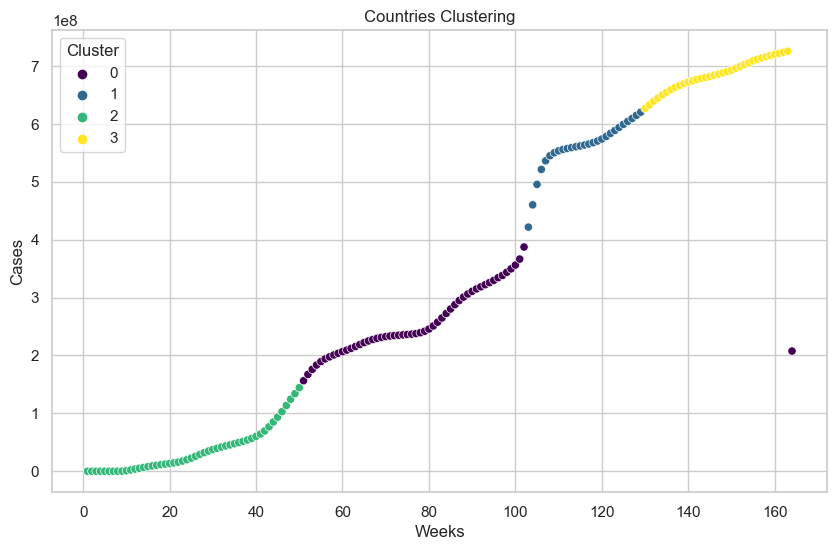

In [609]:
# Perform clustering on the scaled data with the optimal K
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
country_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Create scatter plot
plt.figure(figsize=(10, 6))
g = sns.scatterplot(data=country_data, x='Week', y='Cases', hue='Cluster', palette='viridis', legend=True)

# plot labels and title
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.title('Countries Clustering')

# Show the plot
plt.show()

### outlier removal

it is a  process of identifying observations or data points that deviate significantly from the majority of the dataset.
Outliers can be caused by various factors such as errors in data collection, measurement variability, or genuine rare events
outliers can be affect many crucial thing in data analysis. such as model performance, insights and patterns

__techniques for outlier detection__

Z-Score Method,
IQR (Interquartile Range) Method,
Distance-based Methods.


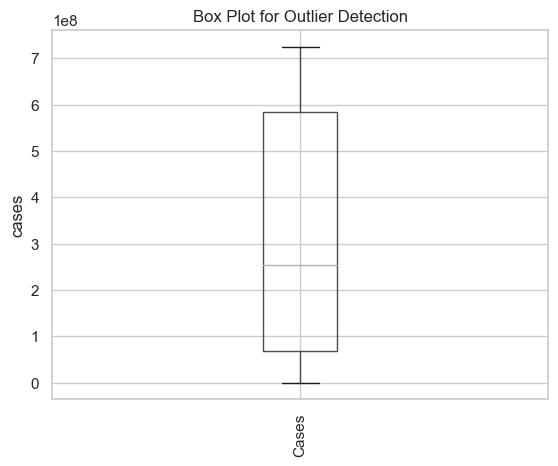

In [610]:
# Box plot for outlier detection
X.boxplot()
plt.title('Box Plot for Outlier Detection')
plt.ylabel('cases')
plt.xticks(rotation=90)
plt.show()

According to the diagram there are no outliers.it means the distribution of the data points is more concentrated and doesn't exhibit any unusually high or low values


__optimal number of clusters__

as there are no outliers, no change to the k means. but this time printed the inertia values to get more clear understanding of the points

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

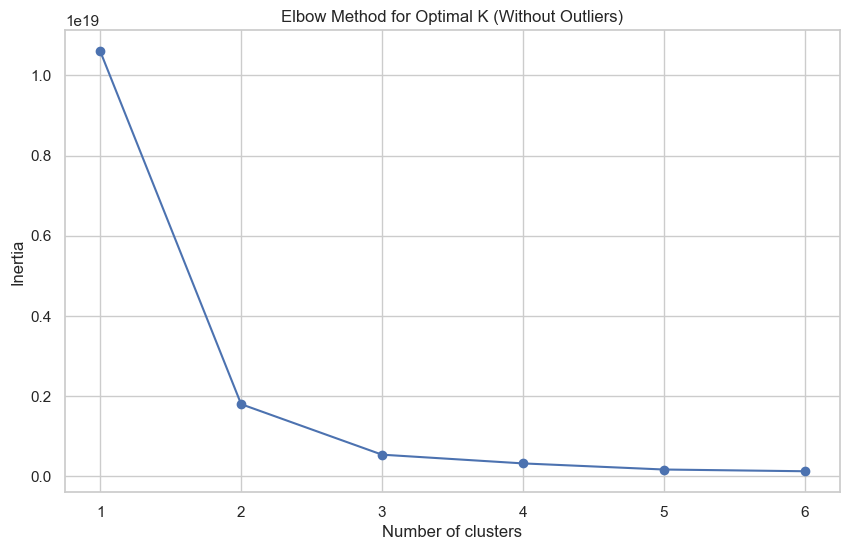

K=1: Inertia=10604310263981037568.00
K=2: Inertia=1797648907071614464.00
K=3: Inertia=536988098231633024.00
K=4: Inertia=319194922932202048.00
K=5: Inertia=166667618064337184.00
K=6: Inertia=123376433003299040.00


In [611]:

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), inertia, marker='o')
plt.title('Elbow Method for Optimal K (Without Outliers)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Print the inertia values for each K
for k, inertia_value in enumerate(inertia, start=1):
    print(f'K={k}: Inertia={inertia_value:.2f}')

In [612]:
X_scaled = scale(X)

# Determine the optimal number of clusters using the Silhouette Score
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'For k={k}, Silhouette Score: {silhouette_avg:.4f}')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k=2, Silhouette Score: 0.7334


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k=3, Silhouette Score: 0.7442


For k=3, the Silhouette Score is 0.8710 which is a good high score. but k=2 carry 0.8874 score. as thre is no huge gap between these two points , i selected k = 3 as the optimal k mean. 

This suggests that, partition into 3 clusters could be a good choice according to the Silhouette Score. On average the samples within each cluster are more similar to each other than to samples in other clusters.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


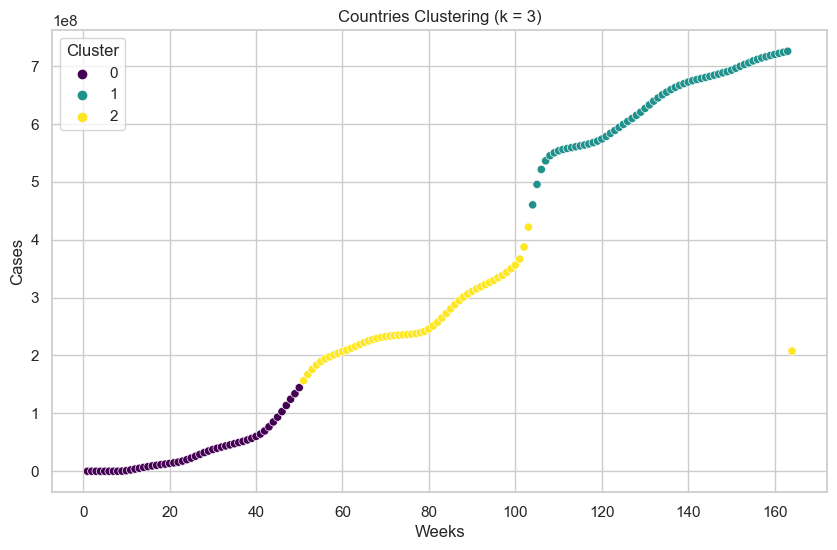

In [613]:
# Perform clustering on the scaled data with the optimal K (k = 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add the 'Cluster' column to the original DataFrame
country_data['Cluster'] = clusters

# Create scatter plot
plt.figure(figsize=(10, 6))
g = sns.scatterplot(data=country_data, x='Week', y='Cases', hue='Cluster', palette='viridis', legend=True)

# Plot labels and title
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.title('Countries Clustering (k = 3)')

# Show the plot
plt.show()

as shown in the diagram, first 20 weeks the cluster shows least number of cases. next 20 weeks cluster '0' shows a gradual increase of cases with sligt fluctuations. however, next 10 weeks the cluster '0' rocketed its cases. 

cluster '2' shows significant significant increases and dicreases of cases around 55 weeks. however number of cases increases rapidly in last 25 weeks 

cluster '1' shows the higherst number of cases compared to other clusters. first 5 weeks didn't show much cases over time but the number cases increases gradually showing neglegible fluctuations. 

## <span style="color:rgb(0, 115, 153)">c) Graph Analytics</span>

### the relationship between US and its neighbouring countries based on the  weekly count of infection


df_grouped contains the grouped data with 'Country/Region', 'Week', and 'Cases' columns and df_long contains the long-format data with 'Country/Region', 'Lat', 'Long', 'Week', and 'Cases' columns

we need these two to create graphs 


In [614]:
df_grouped

,Country/Region,Week,Cases
0,Afghanistan,1,0
1,Afghanistan,2,0
2,Afghanistan,3,0
3,Afghanistan,4,0
4,Afghanistan,5,10
...,...,...,...
32959,Zimbabwe,160,1841581
32960,Zimbabwe,161,1845494
32961,Zimbabwe,162,1847447
32962,Zimbabwe,163,1848889


In [615]:
df_long

,Province/State,Country/Region,Lat,Long,Date,Cases,Week
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,1
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,1
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,1
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,1
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,1
...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,164
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,164
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,164
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,164


In [616]:
# Filter rows for the United States
us_coords = df_long[df_long['Country/Region'] == 'US'][['Lat', 'Long']]

# Display the coordinates
if not us_coords.empty:
    latitude_us = us_coords['Lat'].iloc[0]
    longitude_us = us_coords['Long'].iloc[0]
    print(f"Latitude of the United States: {latitude_us}, Longitude: {longitude_us}")
else:
    print("Coordinates not found for the United States in the DataFrame.")



Latitude of the United States: 40.0, Longitude: -100.0


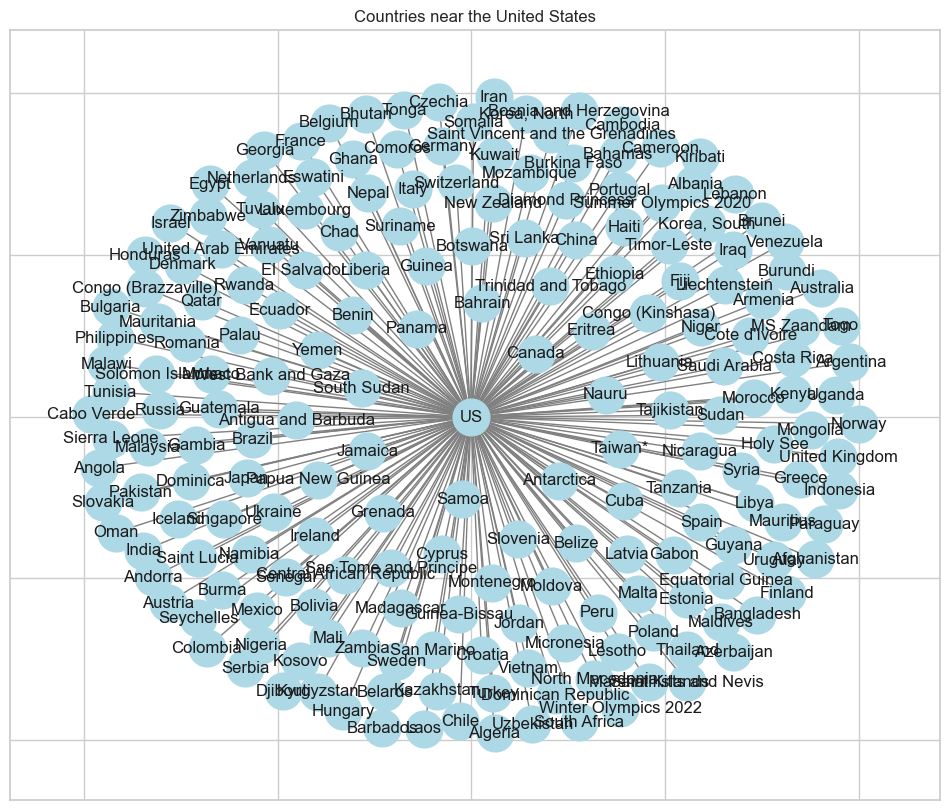

In [618]:
import networkx as nx

# Select the United States
us_data = df[df['Country/Region'] == 'US']
us_lat, us_long = us_data['Lat'].values[0], us_data['Long'].values[0]

# Create a graph
G = nx.Graph()

# Add nodes (each country is a node)
for country in df['Country/Region']:
    G.add_node(country)

# Add edges, assuming a relationship if countries are neighbors based on proximity to the United States
for i in range(len(df)):
    country_lat, country_long = df.iloc[i]['Lat'], df.iloc[i]['Long']
    
    # Calculate distance to the United States
    distance_to_us = ((us_lat - country_lat) ** 2 + (us_long - country_long) ** 2) ** 0.5

    # Countries within a certain distance threshold as neighbors
    distance_threshold = 2000  

    if 0 < distance_to_us < distance_threshold:
        G.add_edge('US', df.iloc[i]['Country/Region'])

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
plt.title('Countries near the United States')
plt.show()


countries near the US are Senagal, liberia,kiribati, russia, serbia, madagascar, italt,uruguay, peru, haiti, dominican republic, Belgium, czechia, colombia, cuba, brazil, 

these countries are used to calculat relationship between the US based on the weekly count of infection

to perform that we need check these countries are in the datra set 

#### check the countries which got highest numver of cases in last 60 weeks representing cluster "1" 

In [619]:
# Filter data for the last 60 weeks
df_60 = df_grouped[df_grouped['Week'] >= df_grouped['Week'].max() - 60]

print 20 countries whose are in the cluster 1. so we can analyse the relationship beteween those countries and the US

In [620]:
# Group by country and sum the cases
df_60 = df_60.groupby('Country/Region')['Cases'].sum().reset_index()

# Sort by total cases in descending order
df_60_total_sorted = df_60.sort_values(by='Cases', ascending=False)

# Select the top 20 countries
top_50 = df_60_total_sorted.head(50)

# Print the top 20 countries
print("Top 30 countries with the highest number of cases in the last 60 weeks:")
print(top_50)

Top 30 countries with the highest number of cases in the last 60 weeks:
     Country/Region        Cases
186              US  38169987920
80            India  18443087187
24           Brazil  13835287466
63           France  13628321213
67          Germany  12116651053
190  United Kingdom   9544692735
94     Korea, South   8374334025
86            Italy   8365376965
147          Russia   7950243024
88            Japan   6933777574
184          Turkey   6607904649
167           Spain   5328037550
195         Vietnam   4158601997
7         Argentina   3970448186
9         Australia   3466550818
128     Netherlands   3375674168
82             Iran   3087328317
117          Mexico   2722165710
38         Colombia   2615500034
81        Indonesia   2597099060
143          Poland   2550154660
188         Ukraine   2242610432
144        Portugal   2022891084
175         Taiwan*   1962476029
10          Austria   1925566328
110        Malaysia   1901496785
85           Israel   1810942188
178 

now check the countries close to Us- 

Russia, Italy,Colombia,Brazil,Belgium,Czechia,United Kingdom,France,Japan,South Korea are the countries close to US


In [631]:
import networkx as nx

# Specify the country in question and neighboring countries
selected_country = 'US'
neighboring_countries = ['Russia', 'Italy', 'Colombia', 'Brazil', 'Belgium', 'Czechia', 
                          'United Kingdom', 'France', 'Japan', 'Korea, South']

# Filter the DataFrame for the specified countries and the last 60 weeks
selected_countries_data = df_grouped[
    (df_grouped['Country/Region'].isin([selected_country] + neighboring_countries)) &
    (df_grouped['Week'] >= df_grouped['Week'].max() - 59)
]

In [632]:


# Create a graph
G = nx.Graph()

# Add nodes (each country is a node)
for country in selected_countries_data['Country/Region']:
    G.add_node(country)

# Add edges (assuming a relationship if countries are in the same cluster and adjacent weeks)
for i in range(len(selected_countries_data)):
    for j in range(i + 1, len(selected_countries_data)):
        if (
            selected_countries_data.iloc[i]['Country/Region'] != selected_countries_data.iloc[j]['Country/Region'] and
            abs(selected_countries_data.iloc[i]['Week'] - selected_countries_data.iloc[j]['Week']) == 1
        ):
            G.add_edge(
                selected_countries_data.iloc[i]['Country/Region'],
                selected_countries_data.iloc[j]['Country/Region'],
                weight=abs(selected_countries_data.iloc[i]['Cases'] - selected_countries_data.iloc[j]['Cases'])
            )


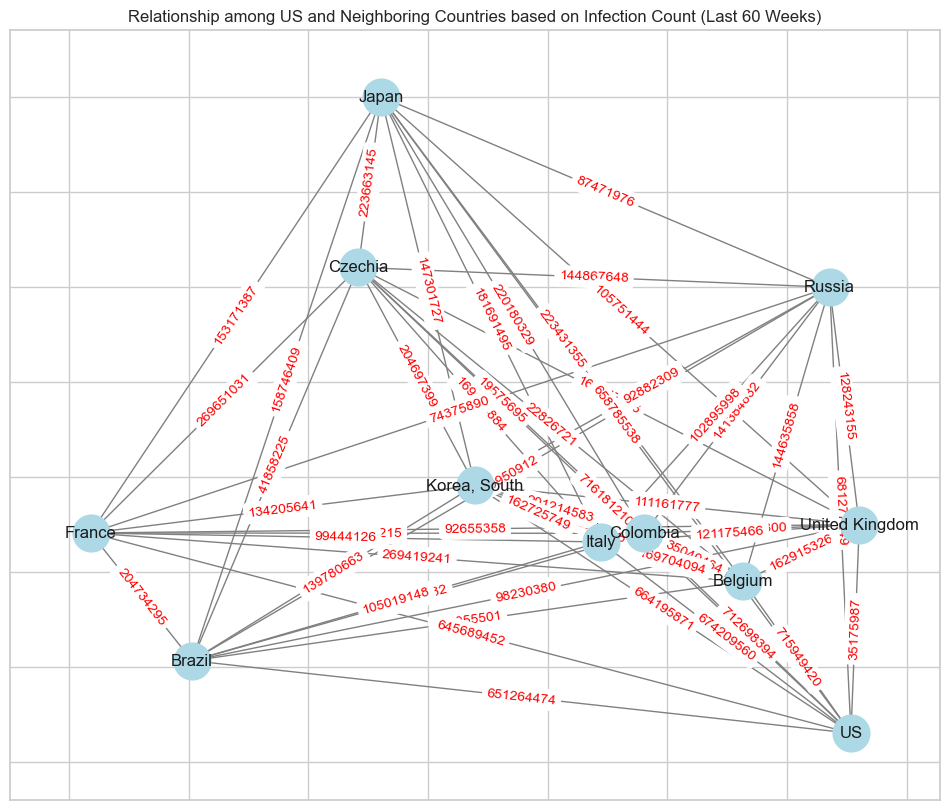

In [654]:
# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Positions for all nodes
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title(f'Relationship among {selected_country} and Neighboring Countries based on Infection Count (Last 60 Weeks)')
plt.show()

this plot shows the relationship between the United States (US) and other countries in terms of the weekly count of infections.

These numbers represent the count of infections and help to analyze the spread of the infection between the US and each respective country over time.

### Assessment 03- Model Evaluation

#### Name- Dulgani Bhagya
#### Student Id - A00087852